In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["rm", "./figs"]).decode("utf8"))

print(check_output(["ls", "."]).decode("utf8"))
print(check_output(["mkdir", "./figs"]).decode("utf8"))


__notebook_source__.ipynb
figs



CalledProcessError: Command '['mkdir', './figs']' returned non-zero exit status 1.

**Incidents by Category in San Francisco**

In [187]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time

In [188]:
namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
analysis_1 = pd.read_csv(namefile_1,  sep=',')


try:   
    ind = pd.DatetimeIndex(analysis_1.Date)
    analysis_1['Date'] = ind.date.astype('datetime64')
    analysis_1['Time'] = ind.hour
except Exception as exc:
    print("Excepcion: {0}".format(exc))
finally:
    print("")
 
by_date1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Date',  columns=['Category'],)
cols= by_date1.columns

for col in range(len(cols)):
    by_date1[cols[col]] = np.int16( by_date1[cols[col]])
  
by_date1.head()




Category,ARSON,ASSAULT,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,...,RUNAWAY,SECONDARY CODES,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-01,1,39,0,0,2,0,1,0,1,0,...,2,3,0,0,10,6,0,19,17,3
2014-06-02,1,43,0,0,1,1,16,0,0,0,...,0,5,0,0,16,1,0,14,24,5
2014-06-03,0,31,0,0,0,0,17,1,0,0,...,0,11,0,1,17,3,0,25,16,6
2014-06-04,0,36,0,1,0,0,16,5,0,0,...,1,5,0,0,27,2,1,26,36,11
2014-06-05,0,37,0,1,0,1,15,2,0,0,...,2,4,0,0,18,7,0,15,22,6


**Incidents by Category in Seatle**

In [168]:
namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
analysis_2 = pd.read_csv(namefile_2,  sep=',')

try:   
    ind = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind.date.astype('datetime64')
except Exception as exc:
    print("Excepcion: {0}".format(exc))
finally:
    print("")
  

by_date2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
cols= by_date2.columns
for col in range(len(cols)):
    by_date2[cols[col]] = np.int16( by_date2[cols[col]])

by_date2.head()



/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Summarized Offense Description,ANIMAL COMPLAINT,ASSAULT,BIAS INCIDENT,BIKE THEFT,BURGLARY,BURGLARY-SECURE PARKING-RES,CAR PROWL,COUNTERFEIT,DISORDERLY CONDUCT,DISPUTE,...,STOLEN PROPERTY,THEFT OF SERVICES,THREATS,TRAFFIC,TRESPASS,VEHICLE THEFT,VIOLATION OF COURT ORDER,WARRANT ARREST,WEAPON,[INC - CASE DC USE ONLY]
Date Reported,,,,,,,,,,,,,,,,,,,,,
2014-06-01,4,22,2,0,20,0,40,2,0,2,...,6,2,20,2,0,15,2,6,0,1
2014-06-02,4,11,0,4,41,4,70,2,0,2,...,6,0,14,5,10,24,0,24,2,0
2014-06-03,0,19,0,9,36,8,72,4,0,2,...,4,1,8,0,8,23,2,9,4,0
2014-06-04,2,30,0,6,50,2,48,3,0,4,...,8,2,12,8,8,35,2,15,0,0
2014-06-05,0,19,0,6,30,4,71,2,0,1,...,8,0,17,3,6,45,2,20,2,0


**Analysis about how do incidents vary by time of day for either city**

In [169]:
import sys
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


Results:


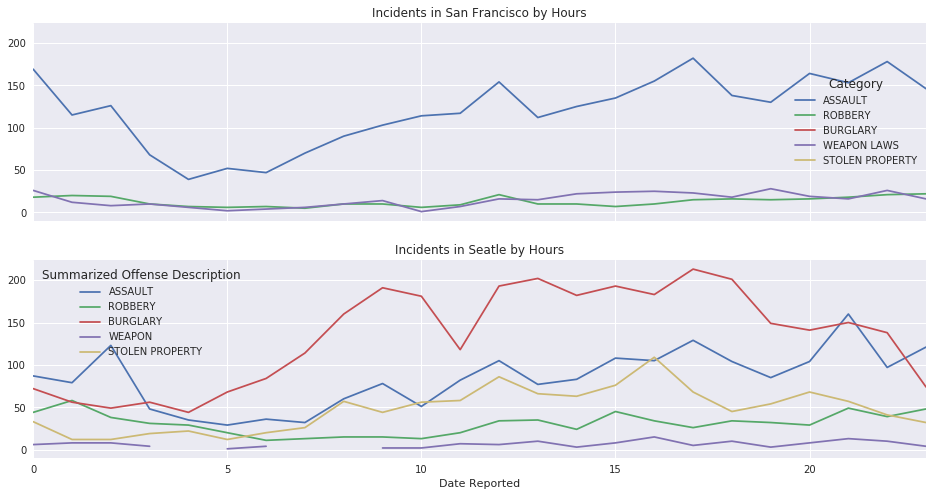

In [170]:
try:   
    namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
    analysis_1 = pd.read_csv(namefile_1,  sep=',')
    ind1 = pd.DatetimeIndex(analysis_1.Time)
    analysis_1.Time = ind1.hour
    
    namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
    analysis_2 = pd.read_csv(namefile_2,  sep=',')
    ind2 = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind2.hour
    
except Exception as exc:
    print("Excepcion: {0}".format(exc))
finally:
    print("")

   

by_day1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Time',  columns=['Category'],)
table_1 = by_day1.iloc[:,[1,23,3,33,26]] 

by_day2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
table_2 = by_day2.iloc[:,[1,36,4,46,38]] 

try:    
    color_cycle = plt.rcParams['axes.color_cycle']
    fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
    table_1.iloc[:, :5].plot(ax=ax[0],title='Incidents in San Francisco by Hours');
    table_2.iloc[:, :5].plot(ax=ax[1],title='Incidents in Seatle by Hours');
    fig.savefig('figs/Question1.png', bbox_inches='tight')    
    
except Exception as exception1:
    print("Graphical plot exception: {0}".format(exception1))
finally:
    print("Results:")





**Analysis about how the incidents are most common in the evening**

In [163]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [164]:
def convert_to_array(table,incident):
    col = 0
    array = [0, 1, 2, 3, 4]
    for index in [0, 1, 2, 3, 4]:
        array[col] = table.iloc[index,incident]
        col = col + 1
    return array

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


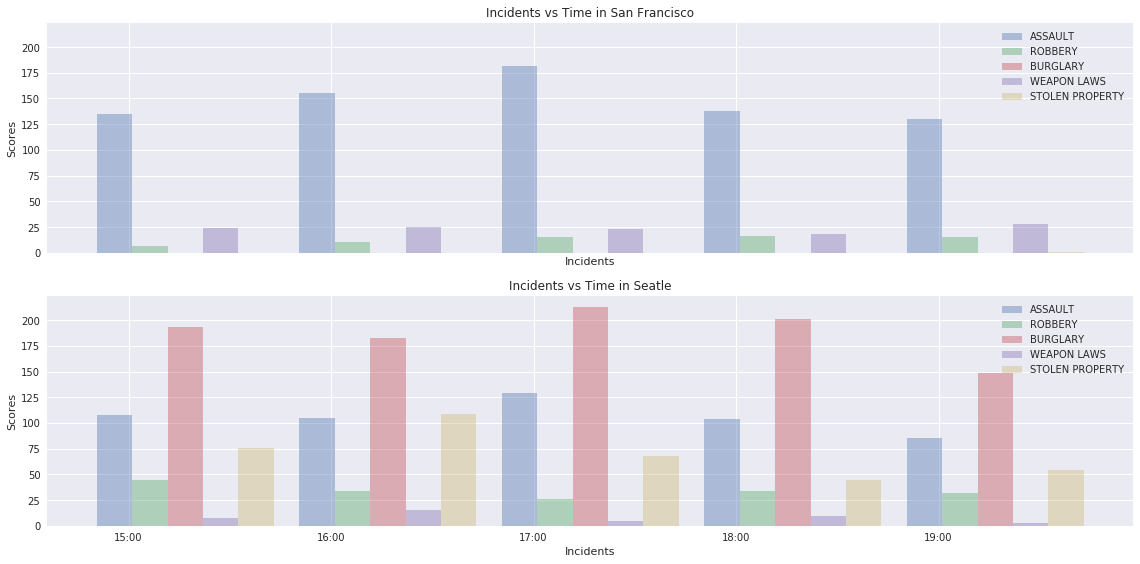

In [171]:

try:   
    namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
    analysis_1 = pd.read_csv(namefile_1,  sep=',')
    ind1 = pd.DatetimeIndex(analysis_1.Time)
    analysis_1.Time = ind1.hour
    
    namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
    analysis_2 = pd.read_csv(namefile_2,  sep=',')
    ind2 = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind2.hour
    
except Exception as exc:
    print("Excepcion: {0}".format(exc))
finally:
    print("")



by_day1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Time',  columns=['Category'],)
cols= by_day1.columns
for col in range(len(cols)):
    by_day1[cols[col]] = np.int16(by_day1[cols[col]])
table_1 = by_day1.iloc[15:20,[1,23,3,33,26]] 

by_day2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
cols= by_day2.columns
for col in range(len(cols)):
    by_day2[cols[col]] = np.int16(by_day2[cols[col]])

table_2 = by_day2.iloc[15:20,[1,36,4,46,38]] 



color_cycle = plt.rcParams['axes.color_cycle']
fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
n_groups = 5
index = np.arange(n_groups)


bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax[0].bar(index, convert_to_array(table_1,0),bar_width/2,alpha=opacity,label=table_1.columns[0])
rects2 = ax[0].bar(index + bar_width/2, convert_to_array(table_1,1),bar_width/2,alpha=opacity,label=table_1.columns[1])  
rects3 = ax[0].bar(index + bar_width, convert_to_array(table_1,2),bar_width/2,alpha=opacity,label=table_1.columns[2]) 
rects4 = ax[0].bar(index + bar_width + bar_width/2, convert_to_array(table_1,3),bar_width/2,alpha=opacity,label=table_1.columns[3]) 
rects5 = ax[0].bar(index + 2 * bar_width, convert_to_array(table_1,4),bar_width/2,alpha=opacity,label=table_1.columns[4]) 

ax[0].set_xlabel('Incidents')
ax[0].set_ylabel('Scores')
ax[0].set_title('Incidents vs Time in San Francisco')
ax[0].set_xticks(index + bar_width / 5)
ax[0].set_xticklabels(('15:00', '16:00', '17:00', '18:00', '19:00'))
ax[0].legend()


rects1 = ax[1].bar(index, convert_to_array(table_2,0),bar_width/2,alpha=opacity,label=table_1.columns[0])
rects2 = ax[1].bar(index + bar_width/2,convert_to_array(table_2,1),bar_width/2,alpha=opacity,label=table_1.columns[1])  
rects3 = ax[1].bar(index + bar_width, convert_to_array(table_2,2),bar_width/2,alpha=opacity,label=table_1.columns[2]) 
rects4 = ax[1].bar(index + bar_width + bar_width/2,convert_to_array(table_2,3),bar_width/2,alpha=opacity,label=table_1.columns[3]) 
rects5 = ax[1].bar(index + 2 * bar_width, convert_to_array(table_2,4),bar_width/2,alpha=opacity,label=table_1.columns[4]) 

ax[1].set_xlabel('Incidents')
ax[1].set_ylabel('Scores')
ax[1].set_title('Incidents vs Time in Seatle')
ax[1].set_xticks(index + bar_width / 5)
ax[1].set_xticklabels(('15:00', '16:00', '17:00', '18:00', '19:00'))
ax[1].legend()



fig.tight_layout()
plt.show()
  

fig.savefig('figs/Question2.png', bbox_inches='tight')
    



**During what periods of the day are robberies most common**

In [172]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import numpy as np
import pandas as pd 
import sys

In [175]:
def convert_to_array_2(table,incident):
    try:
        col = 0
        new_range = range(24)
        array = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
        for index in new_range:
            array[col] = np.int16(table.iloc[index,incident])
            col = col + 1
        return array
    except Exception as exception2:
        print("Exception: {0}".format(exception2))
    finally:
        print("")



/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


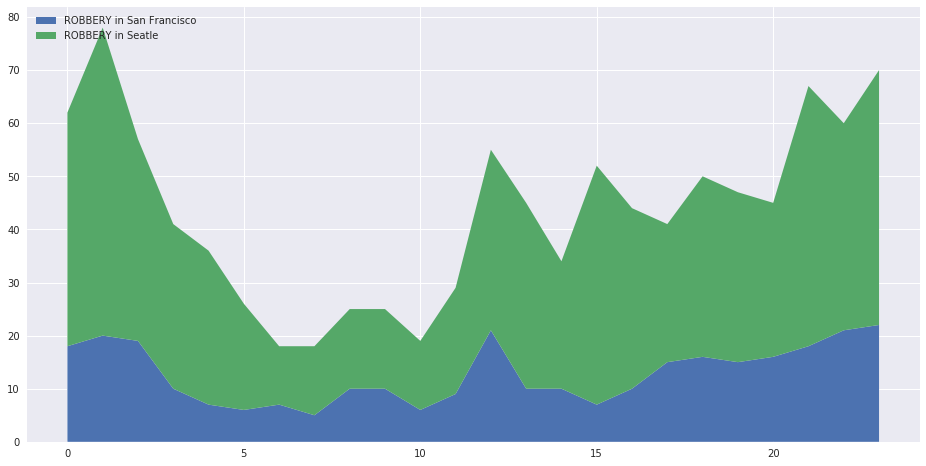

In [176]:
try:   
    namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
    analysis_1 = pd.read_csv(namefile_1,  sep=',')
    ind1 = pd.DatetimeIndex(analysis_1.Time)
    analysis_1.Time = ind1.hour
    
    namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
    analysis_2 = pd.read_csv(namefile_2,  sep=',')
    ind2 = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind2.hour
    
except Exception as exc:
    print("Excepcion: {0}".format(exc))
finally:
    print("")



by_day1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Time',  columns=['Category'],)
cols= by_day1.columns
for col in range(len(cols)):
    by_day1[cols[col]] = np.int16(by_day1[cols[col]])
table_1 = by_day1.iloc[:,[1,23,3,33,26]] 

by_day2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
cols= by_day2.columns
for col in range(len(cols)):
    by_day2[cols[col]] = np.int16(by_day2[cols[col]])

table_2 = by_day2.iloc[:,[1,36,4,46,38]] 



#print(table_1['ROBBERY'])
y1 = convert_to_array_2(table_1,1)
y2 = convert_to_array_2(table_2,1)
x = table_1.index


labels = ["ROBBERY in San Francisco ", "ROBBERY in Seatle"]
color_cycle = plt.rcParams['axes.color_cycle']
fig, ax = plt.subplots(1, 1, figsize=(16, 8), sharex=True, sharey=True)
ax.stackplot(x, y1, y2, labels=labels)
ax.legend(loc=2)
plt.show()

fig.savefig('figs/Question3.png', bbox_inches='tight')



**How do incidents vary month to month in the Summer 2014 dataset**

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time
import sys

In [51]:
NAME_OF_FILE1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
NAME_OF_FILE2 = "../input/datainput2/seattle_incidents_summer_2014.csv"

In [145]:
def graphics_trends(table_1,table_2,title_1,title_2,nameoffile):
    try:    
        color_cycle = plt.rcParams['axes.prop_cycle']
        fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
        table_1.iloc[:, :5].plot(ax=ax[0],title=title_1);
        table_2.iloc[:, :5].plot(ax=ax[1],title=title_2);
        fig.savefig(nameoffile, bbox_inches='tight')    
    
    except Exception as exception1:
        print("Graphical plot exception: {0}".format(exception1))
    finally:
        print("Analysis completed ....")

def read_data_analysis(namefile_1,namedataindex,nametimeindex):
    analysis_1 = pd.read_csv(namefile_1,  sep=',')
    try:   
        ind = pd.DatetimeIndex(analysis_1[namedataindex])
        analysis_1[namedataindex] = ind.date.astype('datetime64')
        analysis_1[nametimeindex] = ind.hour
    except Exception as exc:
        print("Excepcion reading data: {0} {1}".format(exc,namedataindex))
    finally:
        print("Data readed ......")
        return analysis_1

Data readed ......


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Data readed ......
Analysis completed ....


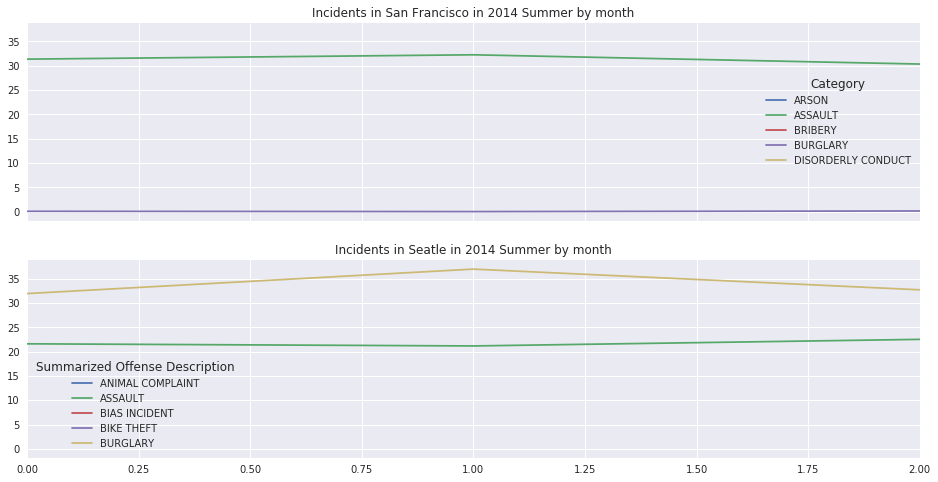

In [156]:
analysis_1 = read_data_analysis(NAME_OF_FILE1,'Date','Time')
by_date1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Date',  columns=['Category'],)
cols= by_date1.columns
for col in range(len(cols)):
    by_date1[cols[col]] = np.int16( by_date1[cols[col]])
analysis_2 = read_data_analysis(NAME_OF_FILE2,'Date Reported','Time')
by_date2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
cols= by_date2.columns
for col in range(len(cols)):
    by_date2[cols[col]] = np.int16( by_date2[cols[col]])
    
by_date2_final = by_date2['06-2014':'09-2014']
by_date1_final = by_date1['06-2014':'09-2014']

try:
    colsnames = ['06-2014','07-2014','08-2014']
    table_1 = pd.DataFrame(columns=by_date1_final.columns)
    table_2 = pd.DataFrame(columns=by_date2_final.columns)
    for index in range(3):
        record = by_date1_final[colsnames[index]]
        array=record.iloc[:,:].mean()
        table_1.loc[index,'ASSAULT'] = array['ASSAULT']
        table_1.loc[index,'BURGLARY'] = array['BURGLARY']
        table_1.loc[index,'ROBBERY'] = array['ROBBERY']
        table_1.loc[index,'WEAPON LAWS'] = array['WEAPON LAWS']
        table_1.loc[index,'STOLEN PROPERTY'] = array['STOLEN PROPERTY']
        
        record = by_date2_final[colsnames[index]]
        array=record.iloc[:,:].mean()
        table_2.loc[index,'ASSAULT'] = array['ASSAULT']
        table_2.loc[index,'BURGLARY'] = array['BURGLARY']
        table_2.loc[index,'ROBBERY'] = array['ROBBERY']
        table_2.loc[index,'WEAPON'] = array['WEAPON']
        table_2.loc[index,'STOLEN PROPERTY'] = array['STOLEN PROPERTY']
   
except Exception as exception1:
    print("Exception: {0}".format(exception1))
    sys.exit(0)

graphics_trends(table_1,table_2,'Incidents in San Francisco in 2014 Summer by month',
                'Incidents in Seatle in 2014 Summer by month',
                'figs/Question5_1.png')



**How do incidents vary day to day in the Summer 2014 dataset**

In [177]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time
import sys

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


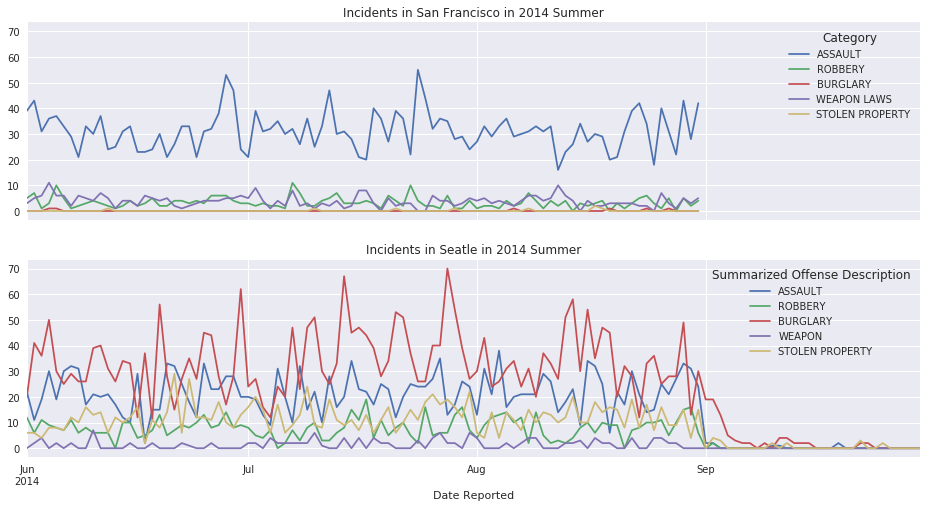

In [180]:
namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
analysis_1 = pd.read_csv(namefile_1,  sep=',')
try:   
    ind = pd.DatetimeIndex(analysis_1.Date)
    analysis_1['Date'] = ind.date.astype('datetime64')
    analysis_1['Time'] = ind.hour
except Exception as exc:
    print("Excepcion: {0}".format(exc))
finally:
    print("") 
by_date1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Date',  columns=['Category'],)
cols= by_date1.columns
for col in range(len(cols)):
    by_date1[cols[col]] = np.int16( by_date1[cols[col]])
namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
analysis_2 = pd.read_csv(namefile_2,  sep=',')
try:   
    ind = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind.date.astype('datetime64')
except Exception as exc:
    print("Excepcion: {0}".format(exc))
finally:
    print("")
by_date2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
cols= by_date2.columns
for col in range(len(cols)):
    by_date2[cols[col]] = np.int16( by_date2[cols[col]])
    
by_date2_final = by_date2['06-2014':'09-2014']
by_date1_final = by_date1['06-2014':'09-2014']

try:
    
    
    table_1 = by_date1_final.iloc[:,[1,23,3,33,26]] 
    table_2 = by_date2_final.iloc[:,[1,36,4,46,38]]
    
except Exception as exception1:
    print("Exception: {0}".format(exception1))


try:    
    color_cycle = plt.rcParams['axes.color_cycle']
    fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
    table_1.iloc[:, :5].plot(ax=ax[0],title='Incidents in San Francisco in 2014 Summer');
    table_2.iloc[:, :5].plot(ax=ax[1],title='Incidents in Seatle in 2014 Summer');
    fig.savefig('figs/Question5.png', bbox_inches='tight')    
    
except Exception as exception1:
    print("Graphical plot exception: {0}".format(exception1))
finally:
    print("")
    
    